In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df1.duplicated().sum()

1

In [ ]:
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df1.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **So the data looks really good and clean. so lets move on to the analysis part.**

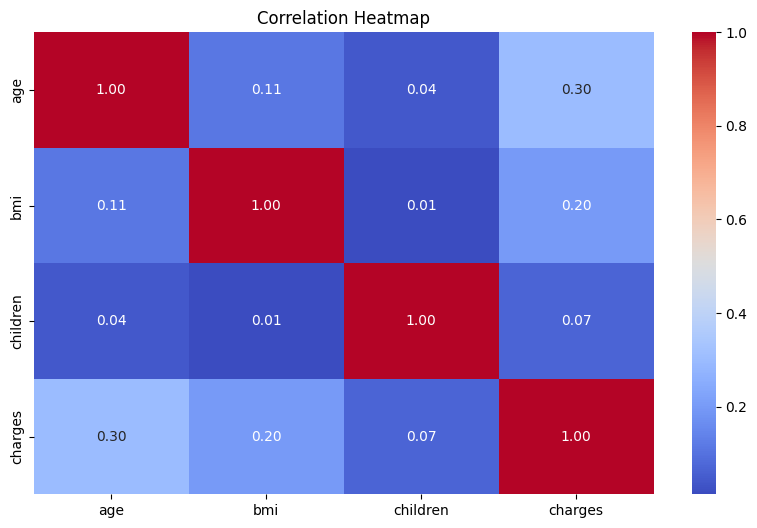

In [ ]:
matrix_corr = df1.corr(numeric_only=True)
matrix_corr

plt.figure(figsize=(10, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Which Ages People are most in our dataset

df1['age'].value_counts()

,count
age,
18,69
19,68
50,29
51,29
47,29
46,29
45,29
20,29
48,29


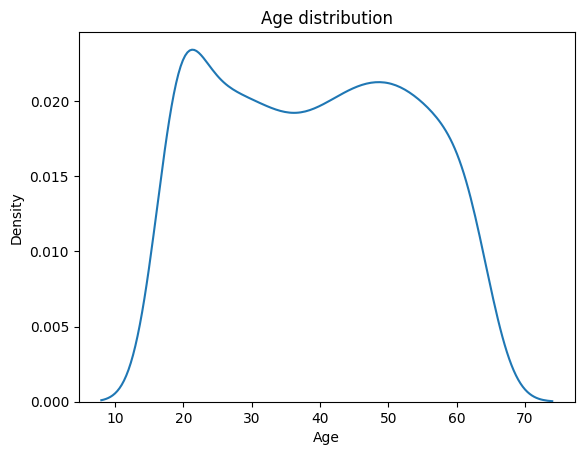

In [ ]:
sns.kdeplot(df1['age'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

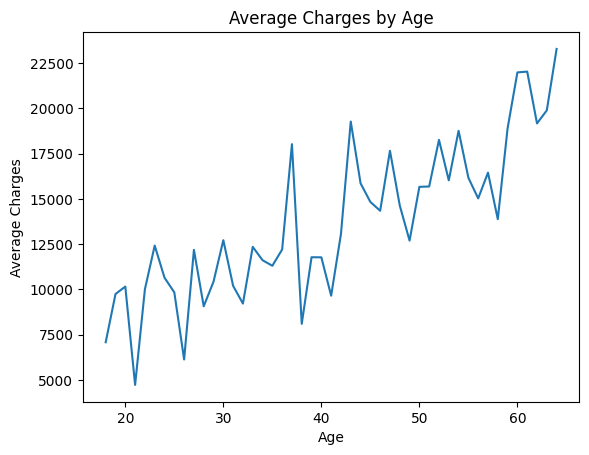

In [ ]:
# Average Charges By Age

average_charges_by_age = df1.groupby('age')['charges'].mean().reset_index()
plt.plot(average_charges_by_age['age'], average_charges_by_age['charges'])
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.show()

In [ ]:
# Gender Distribution in the Dataset

sex_counts = df1['sex'].value_counts()
sex_counts

,count
sex,
male,676
female,662


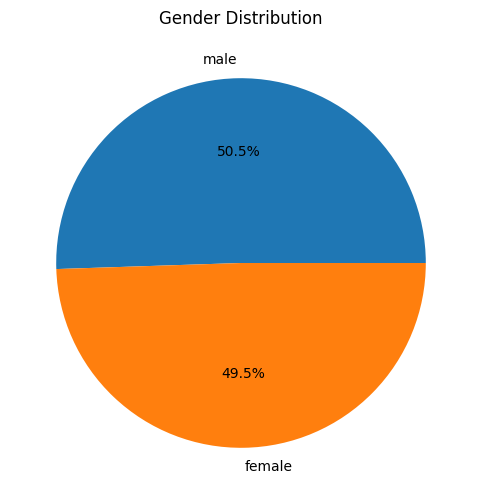

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.title('Gender Distribution')
plt.show()

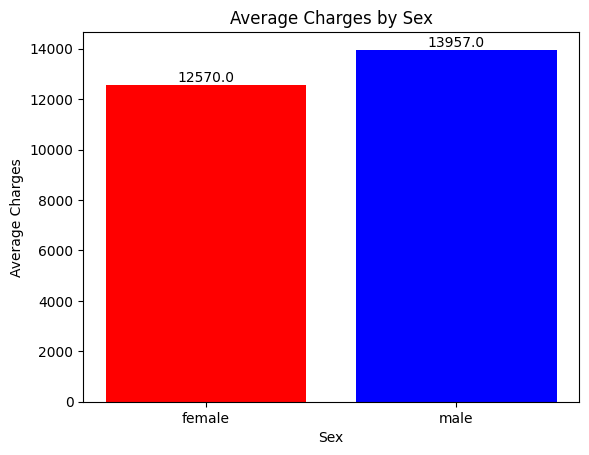

In [ ]:
# Is there difference between male and female charges

average_charges_by_sex = df1.groupby('sex')['charges'].mean().reset_index().round()
plt.bar(average_charges_by_sex['sex'], average_charges_by_sex['charges'], color=['red', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Average Charges')
plt.title('Average Charges by Sex')
for i, value in enumerate(average_charges_by_sex['charges']):
  plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

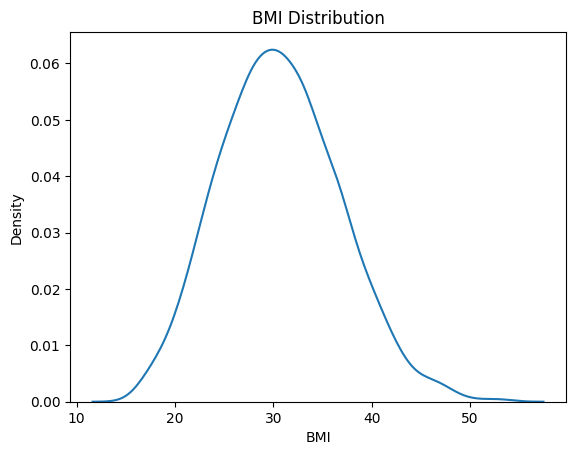

In [ ]:
# Bmi Distribution in data

sns.kdeplot(df1['bmi'])
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

In [ ]:
df1['bmi'].describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


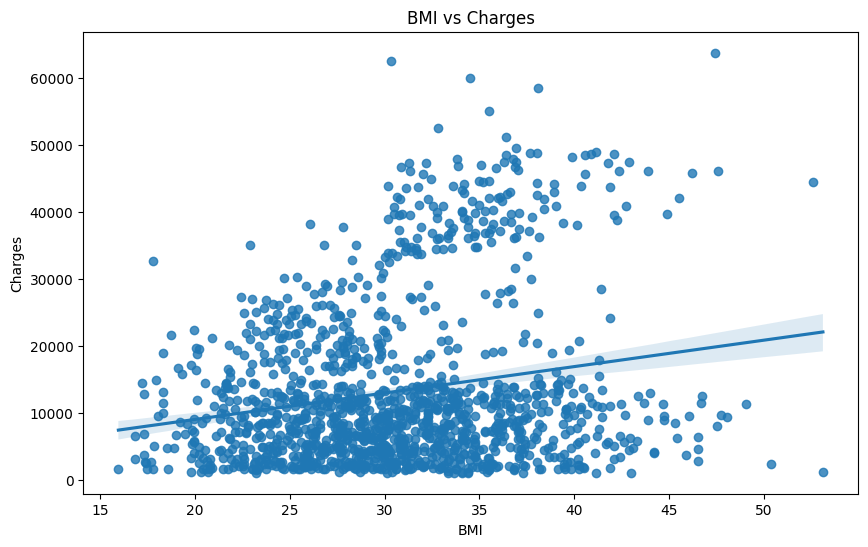

In [ ]:
# Is there a correlation between BMI and charges?

plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df1)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [ ]:
children_counts = df1['children'].value_counts()
children_counts

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


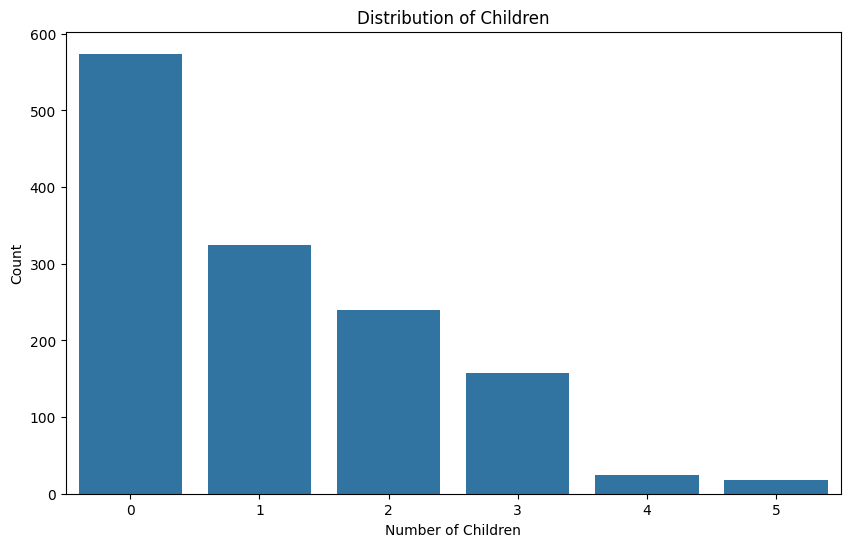

In [ ]:
# Children Analysis

plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=df1)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Children')
plt.show()

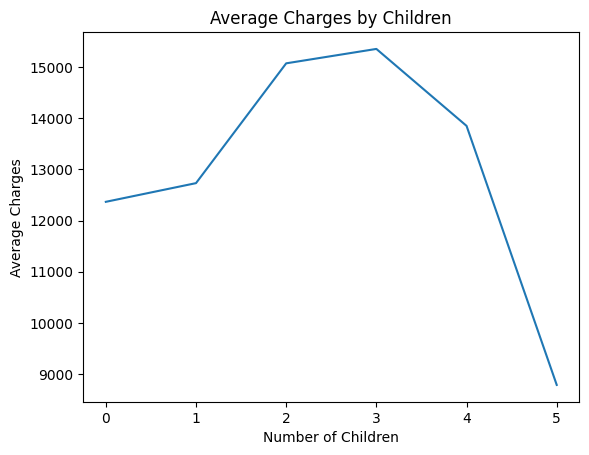

In [ ]:
# Average Charges By Children

average_charges_by_children = df1.groupby('children')['charges'].mean().reset_index()
plt.plot(average_charges_by_children['children'], average_charges_by_children['charges'])
plt.title('Average Charges by Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
smoker_count = df1['smoker'].value_counts()

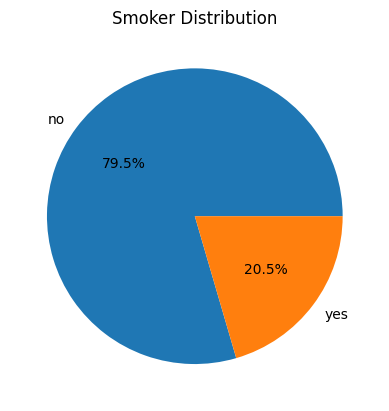

In [ ]:
# Smoker Distribution

plt.pie(smoker_count, labels=smoker_count.index, autopct='%1.1f%%')
plt.title('Smoker Distribution')
plt.show()

In [ ]:
df1.groupby('smoker')['charges'].mean().reset_index()

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


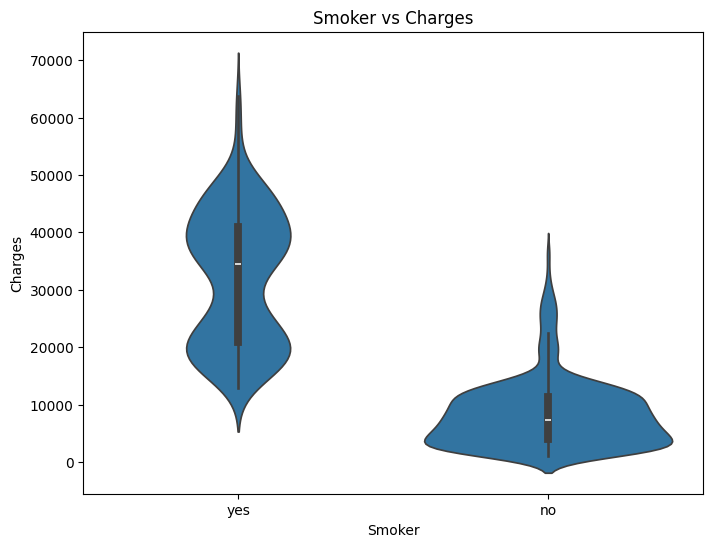

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='smoker', y='charges', data=df1)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [ ]:
region_counts = df1['region'].value_counts()
region_counts

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


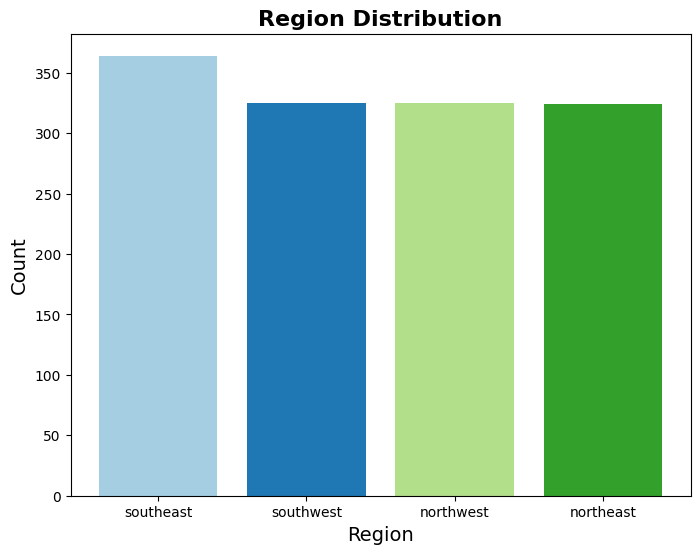

In [ ]:
# Which region has the highest number of individuals?

plt.figure(figsize=(8, 6))
plt.bar(region_counts.index, region_counts.values, color=plt.cm.Paired.colors)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Region Distribution', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
top_charges = df1.sort_values(by='charges', ascending=False).head(5)
top_charges

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


<ipython-input-31-b07a62836159>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#a6cee3'` for the same effect.

  sns.barplot(x='charges', y='age', hue='sex', data=top_charges, color=plt.cm.Paired(0))


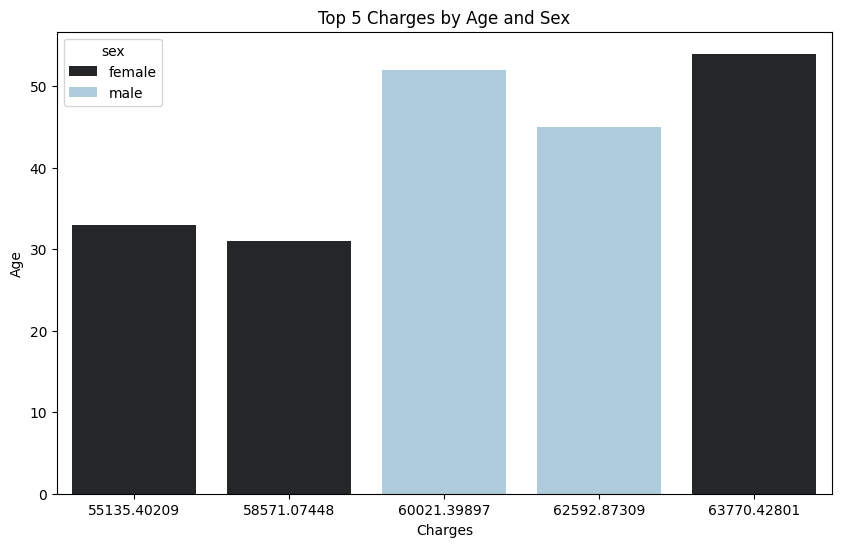

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='charges', y='age', hue='sex', data=top_charges, color=plt.cm.Paired(0))
plt.xlabel('Charges')
plt.ylabel('Age')
plt.title('Top 5 Charges by Age and Sex')
plt.show()

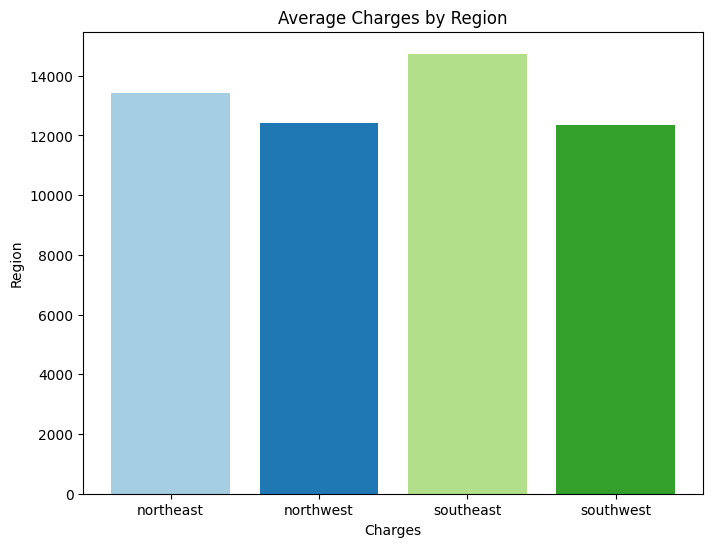

In [ ]:
# Which region has the highest average charges?

region_avg_charges = df1.groupby('region')['charges'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(region_avg_charges['region'], region_avg_charges['charges'], color = plt.cm.Paired.colors)
plt.title('Average Charges by Region')
plt.xlabel('Charges')
plt.ylabel('Region')
plt.show()

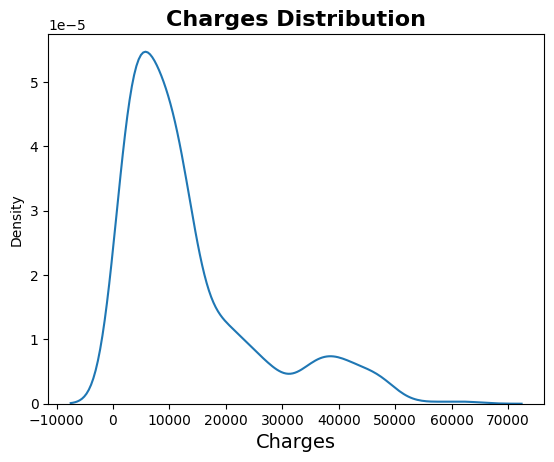

In [ ]:
# Distribution of Charges

sns.kdeplot(df1['charges'])
plt.title('Charges Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Charges', fontsize=14)
plt.show()

In [ ]:
df1['charges'].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


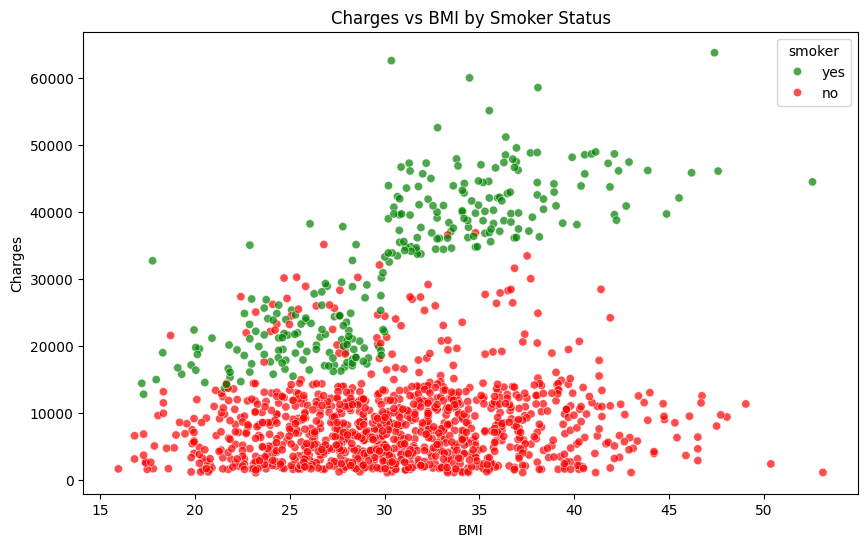

In [ ]:
# Do smokers with high BMI have significantly higher charges?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df1, palette={'yes' : 'green', 'no' : 'red'}, alpha=0.7)
plt.title('Charges vs BMI by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

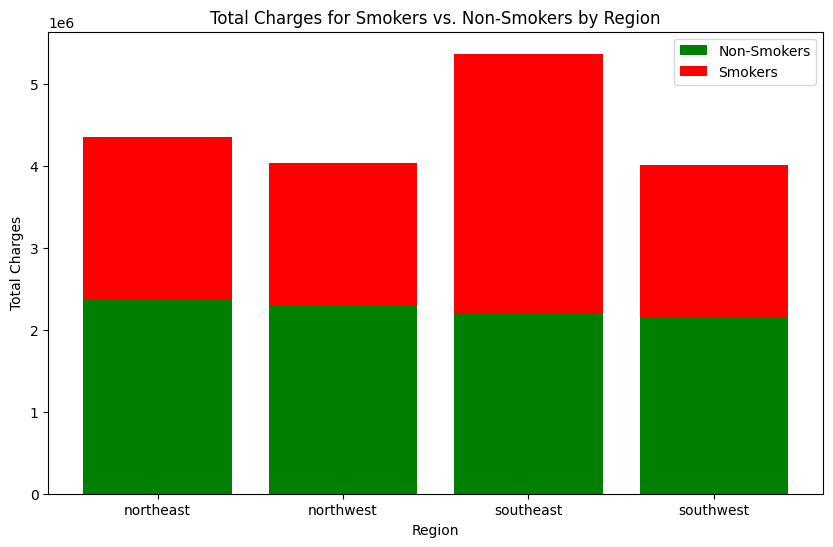

In [ ]:
# Total Charges for Smokers vs. Non-Smokers by Region

region_smoker_charges = df1.groupby(['region', 'smoker'])['charges'].sum().reset_index()

plt.figure(figsize = (10, 6))
regions = region_smoker_charges['region'].unique()

smoker_charges = region_smoker_charges[region_smoker_charges['smoker'] == 'yes']['charges'].values
nonsmoker_charges = region_smoker_charges[region_smoker_charges['smoker'] == 'no']['charges'].values

plt.bar(regions, nonsmoker_charges, label='Non-Smokers', color='green')
plt.bar(regions, smoker_charges, bottom=nonsmoker_charges, label='Smokers', color='red')

plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.title('Total Charges for Smokers vs. Non-Smokers by Region')
plt.legend()
plt.show()

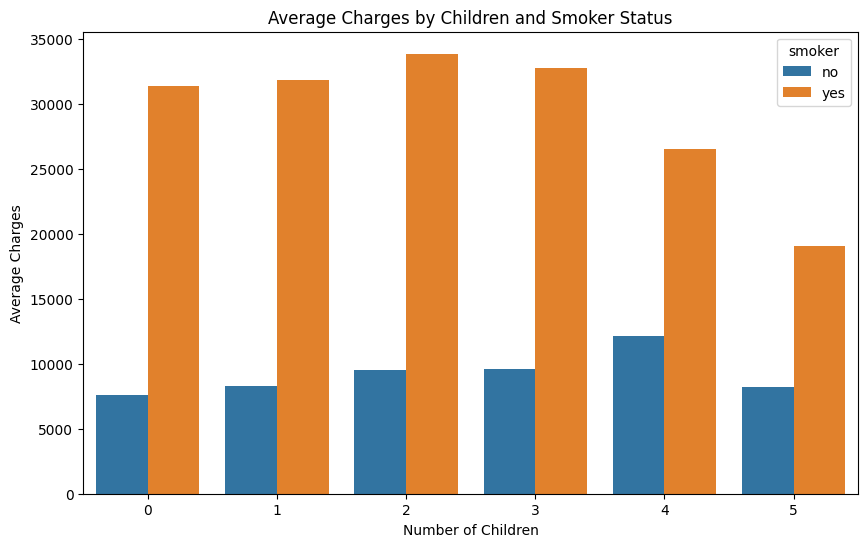

In [38]:
# How does the number of children impact charges for smokers vs. non-smokers?

smoker_children_charges = df1.groupby(['smoker', 'children'])['charges'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', hue='smoker', data=smoker_children_charges)
plt.title('Average Charges by Children and Smoker Status')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()